# Meetup 4 - Intro to scikit-learn
Author: Alek Petty - Material based on the sea ice hackathon 
Description: Simple examples sea ice classification with scikit-learn


For some really good introductions to scikit-learn, take a look at 
https://github.com/jakevdp/sklearn_tutorial 

###Scikit-learn

(copied from above): Scikit-Learn is a **Python** package designed to give access to well-known machine learning algorithms within Python code, through a clean, well-thought-out API. It has been built by hundreds of contributors from around the world, and is used across industry and academia.
Scikit-Learn is built upon Python's **NumPy** (Numerical Python) and **SciPy** (Scientific Python) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is some work in this area.

###Machine learning

Machine Learninginvolves building programs with tunable parameters that are adjusted automatically so as to improve their behavior by adapting to new data.
Machine Learning is often considered a subfield of **Artificial Intelligence** i.e. making computers learn to behave more intelligently by somehow generalizing rather that just storing and retrieving data items like a database system would do.

If you want to learn more about Machine Learning - I strongly recommend the Stanford/Andrew Ng Coursera course (free online training courses) https://www.coursera.org/learn/machine-learning
(note that you can't do these in Python, he uses Matlab/Octave)

###Imagery classification example

In [3]:
%matplotlib inline
#import cv2
from pylab import *
from scipy import misc
from skimage.segmentation import mark_boundaries

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


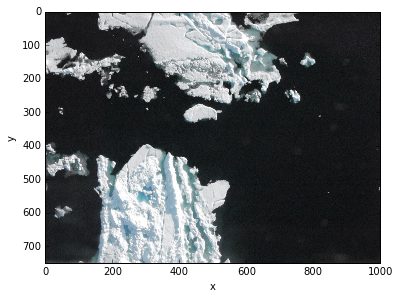

In [4]:
filePath = "../DATA/IMAGERY/"
image1="heli1.jpg"
img = misc.imread(filePath+image1)
fig1 = figure(figsize=(6, 6))
xlabel('x')
ylabel('y')
imshow(img)
plt.show()

In [5]:
#load and apply the Gaussian Mixture Model (GMM) classification scheme to one sea ice image.
from sklearn import mixture
iceTypes=3
#n_components is the number of surface types we want to find.
gmix = mixture.GMM(n_components=iceTypes, covariance_type='full')
#fit to image
gmix.fit(img.reshape((img.shape[0]*img.shape[1],3)))
#extract class means and cov

#this can be made a 'supervised' training method by setting .means_ and .covars_ to mean/cov of samples
#mean = gmix.means_
#cov = gmix.covars_

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [6]:
#predict back to image
labeled_img = gmix.predict(img.reshape((img.shape[0]*img.shape[1],3))).\
    reshape(img.shape[0],img.shape[1])

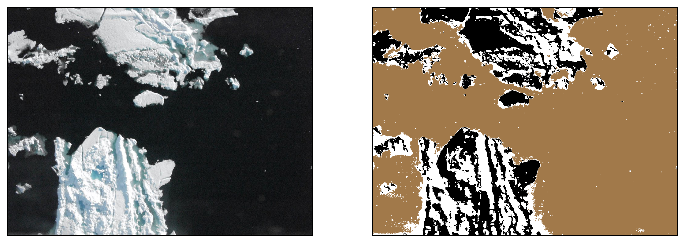

In [7]:
# Plot out the classification
fig2, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(12, 6))
ax[0].imshow(img)
ax[1].imshow(labeled_img, cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())

In [8]:
# Read in another sea ice image (from the same helicopter campaign)
image2="heli2.jpg"
img2 = misc.imread(filePath+image2)
# label using the previous GMM model
labeled_img6 = gmix.predict(img2.reshape((img2.shape[0]*img2.shape[1],3))). \
    reshape(img2.shape[0],img2.shape[1])

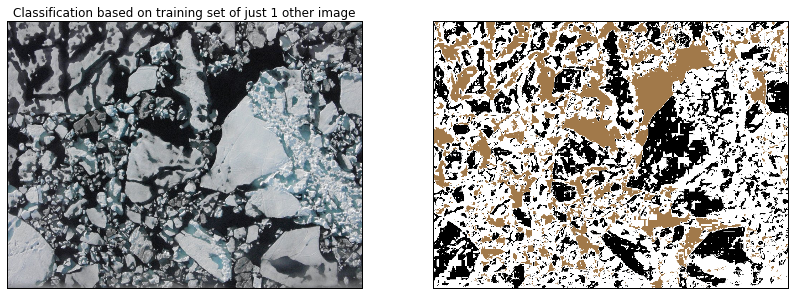

In [9]:
# Plot out this classification
fig7, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(img2)
ax[1].imshow(labeled_img6, cmap=cm.cubehelix)
ax[0].set_title("Classification based on training set of just 1 other image")
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

# Segmentation
Example of the Quickshift segmentation algorithm (there are many more!)   
While the results look a bit odd (over segmented), the polygons do seem to bound regions quite nicely. 
Clearly need to classify and merge cells of similar type 

In [30]:
from skimage.segmentation import quickshift
labeled_img4 = quickshift(img, kernel_size=5, max_dist=10, ratio=0.5)

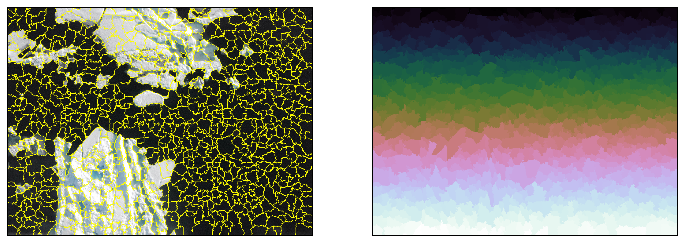

In [31]:
fig4, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(12, 6))
#ax[0].imshow(img)
ax[0].imshow(mark_boundaries(img, labeled_img4))
ax[1].imshow(labeled_img4, cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

### conclusion
Arguably better to then use these objects (rather than pixels) to drive the sea ice classification. SHould also improve computation time. This is still work in progress, but see https://github.com/polar-computing/SeaIce/tree/master/Notebooks for more details!..